In [22]:
# import statements
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

#historical data
tickers = ['IBM', 'INTC', 'ORCL', 'CSCO', 'SAP', 'ADBE', 'CRM', 'NVDA', 'AMD']
data = yf.download(tickers, start="2010-01-01", end="2023-10-01")['Adj Close']


[*********************100%%**********************]  9 of 9 completed


In [23]:
returns = data.pct_change().dropna()
#rolling volatility & mean return
volatility = returns.rolling(window=21).std().dropna()
rolling_mean_returns = returns.rolling(window=21).mean().dropna()


In [24]:
mean_returns = rolling_mean_returns.mean()
mean_volatility = volatility.mean()
features = pd.DataFrame({
    'Mean_Returns': mean_returns,
    'Mean_Volatility': mean_volatility
})

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

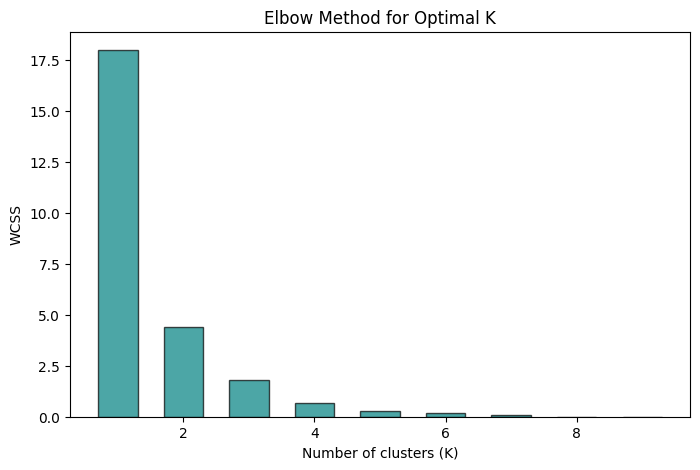

In [25]:

# Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

#elbow curve
plt.figure(figsize=(8, 5))
plt.bar(K, wcss, color='teal', edgecolor='black', width=0.6, alpha=0.7)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

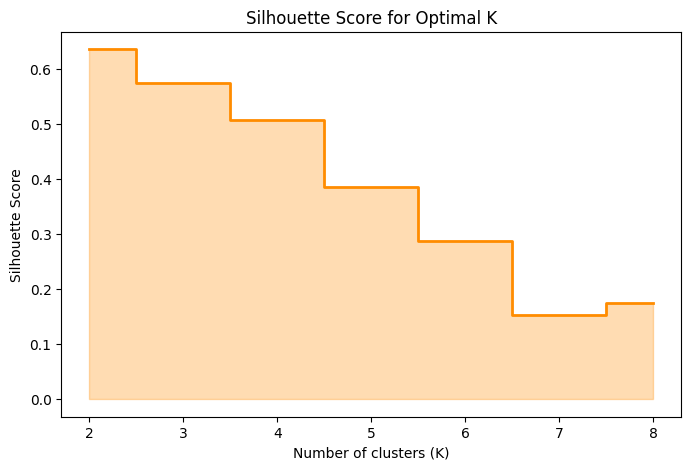

In [26]:
#silhouette Score for optimal K
silhouette_scores = []
for k in range(2, 9):  # Adjust the range to be within the number of samples
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(features_scaled, labels))

#Plot
plt.figure(figsize=(8, 5))
plt.step(range(2, 9), silhouette_scores, where='mid', color='darkorange', linewidth=2)
plt.fill_between(range(2, 9), silhouette_scores, step='mid', color='darkorange', alpha=0.3)
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


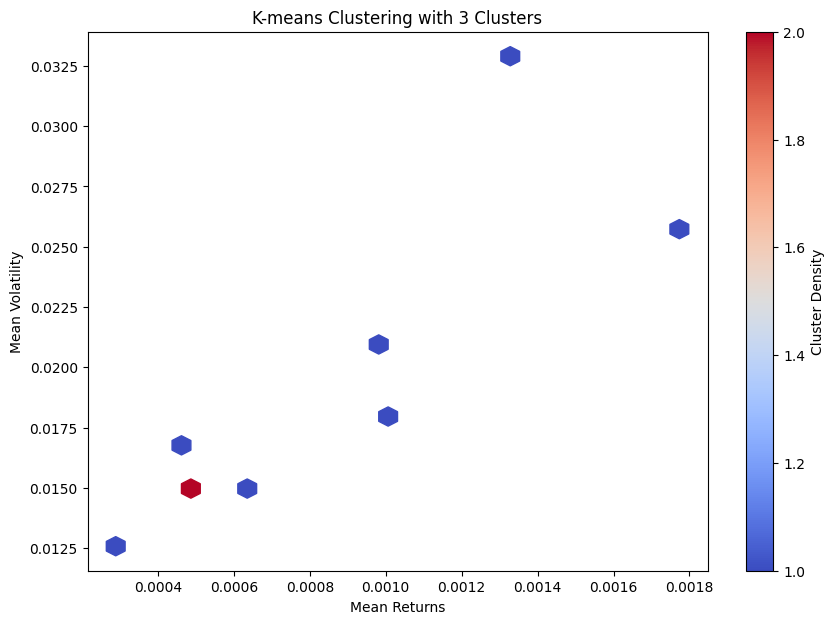

In [27]:
# KMeans Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
features['Cluster'] = kmeans.fit_predict(features_scaled)

#plots
plt.figure(figsize=(10, 7))
hb = plt.hexbin(features['Mean_Returns'], features['Mean_Volatility'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(hb, label='Cluster Density')
plt.title(f'K-means Clustering with {optimal_k} Clusters')
plt.xlabel('Mean Returns')
plt.ylabel('Mean Volatility')
plt.show()



### Conclusion
This analysis provides insights into the clustering of selected stocks based on mean returns and volatility.
The modified Elbow Method, Silhouette Score, and hexbin plot offer unique perspectives on the optimal cluster count and the nature of stock groupings, contributing to a better understanding of stock behaviors.
